[[-4.09258882]
 [ 1.55273657]]
[[0.0350189  0.0507849  0.07311118 0.10417545 0.14635453 0.20176493
  0.20176493 0.27148216 0.35458818 0.44750729 0.54424317 0.6377521
  0.72187975 0.79281687 0.89267466 0.92459914 0.94758509 0.96383784
  0.97518295 0.98842726]]


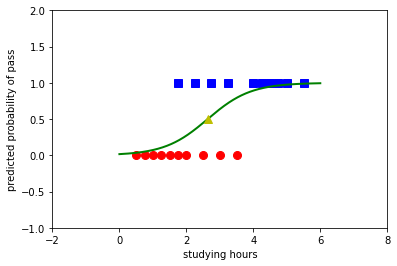

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
#random dữ liệu
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
#mở rộng thêm data (Xbar)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
def sigmoid(s): #sigmoid: f(s) = 1/(1+e^(-s))
  return 1/(1+np.exp(-s)) #s là 1 array numpy
def logistic_sigmoid_regression(X, y, w_init, eta):
  w = [w_init]
  N = X.shape[1] # số lượng sample
  d = X.shape[0] # số lượng chiều dữ liệu, hay còn gọi là số lượng weight
  count = 0 #đếm số lượng các lượt xét hiện thời
  while count < 10000:
    mix_data = np.random.permutation(N) #trộn data
    for i in mix_data:
      xi = X[:, i].reshape(d,1) #lấy 1 tập hợp điểm (1 điểm mỗi class) để xét
      yi = y[i]
      zi = sigmoid(np.dot(w[-1].T,xi)) # đặt z_i = w^T*x_i
      w_new = w[-1] + eta*(yi-zi)*xi #công thức logistic regression theo sigmoid
      count+=1 
      if count%N == 0: #sau khi kết thúc một vòng các sample
        if np.linalg.norm(w_new - w[-N]) < 0.0001: 
          """check xem liệu w mới nhận được với w cách trước đây 20
         vòng lặp, hay còn gọi là w tối ưu của lần SGD trước, xem có thay đổi nhiều k, nếu k thay đổi nhiều
          thì dừng"""
          return w[-1]
      w.append(w_new)
  return w[-1]
eta = 0.05
d = X.shape[0]
w_init = np.random.rand(d,1)
w = logistic_sigmoid_regression(X,y,w_init,eta)
print(w)

#output ra:
#công thức đầu ra: y = sigmoid(w0+w1*x+...)
print(sigmoid(np.dot(w.T, X)))

#visual dữ liệu
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[0][0]
w1 = w[1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()
